In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import ipympl
%matplotlib widget
from qutip import *
from scipy.linalg import expm

In [3]:
sigma_z = Qobj([[1, 0], [0, -1]])
sigma_plus = Qobj([[0, 0], [1, 0]])
sigma_minus = Qobj([[0, 1], [0, 0]])

## Diferentes valores de $\Omega$ y su explicación física

10.0%. Run time:   1.69s. Est. time left: 00:00:00:15
20.0%. Run time:   3.41s. Est. time left: 00:00:00:13
30.0%. Run time:   5.13s. Est. time left: 00:00:00:11
40.0%. Run time:   6.86s. Est. time left: 00:00:00:10
50.0%. Run time:   8.57s. Est. time left: 00:00:00:08
60.0%. Run time:  10.29s. Est. time left: 00:00:00:06
70.0%. Run time:  12.05s. Est. time left: 00:00:00:05
80.0%. Run time:  13.76s. Est. time left: 00:00:00:03
90.0%. Run time:  15.50s. Est. time left: 00:00:00:01
100.0%. Run time:  17.21s. Est. time left: 00:00:00:00
Total run time:  17.25s


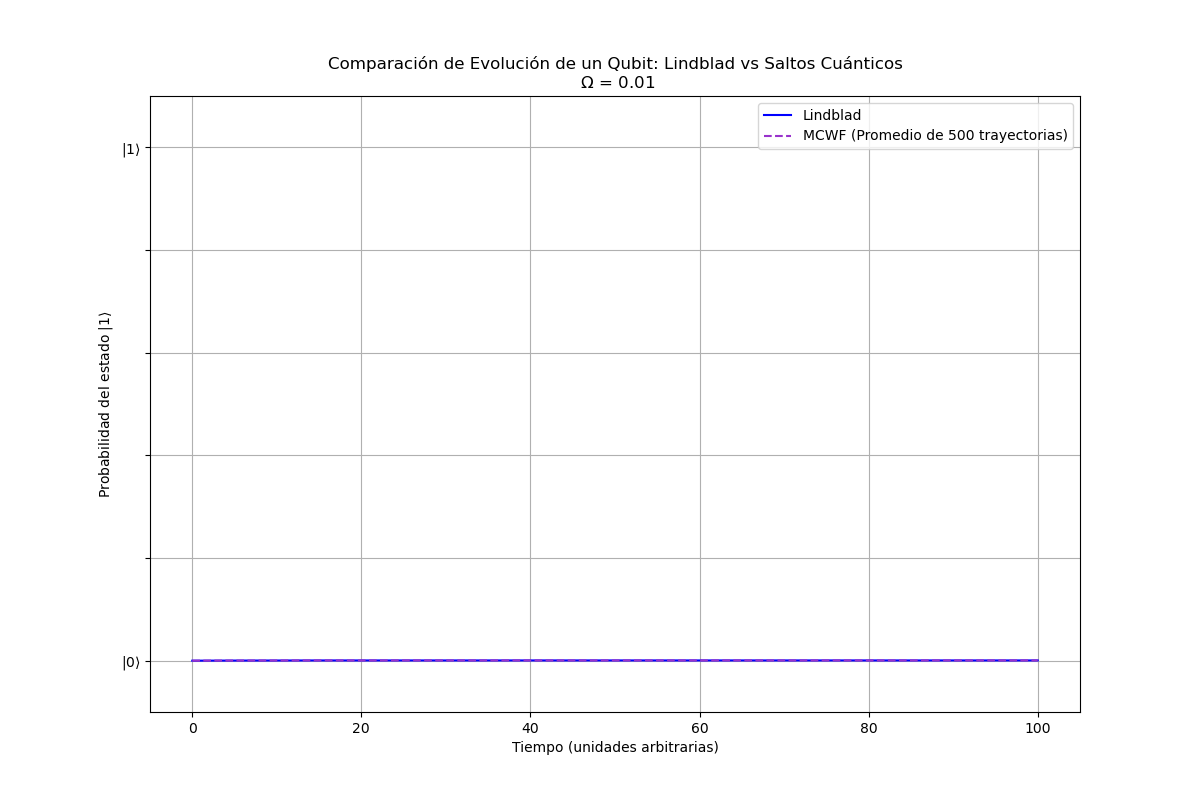

10.0%. Run time:   1.80s. Est. time left: 00:00:00:16
20.0%. Run time:   3.63s. Est. time left: 00:00:00:14
30.0%. Run time:   5.46s. Est. time left: 00:00:00:12
40.0%. Run time:   7.28s. Est. time left: 00:00:00:10
50.0%. Run time:   9.11s. Est. time left: 00:00:00:09
60.0%. Run time:  10.92s. Est. time left: 00:00:00:07
70.0%. Run time:  12.75s. Est. time left: 00:00:00:05
80.0%. Run time:  14.63s. Est. time left: 00:00:00:03
90.0%. Run time:  16.45s. Est. time left: 00:00:00:01
100.0%. Run time:  18.28s. Est. time left: 00:00:00:00
Total run time:  18.32s


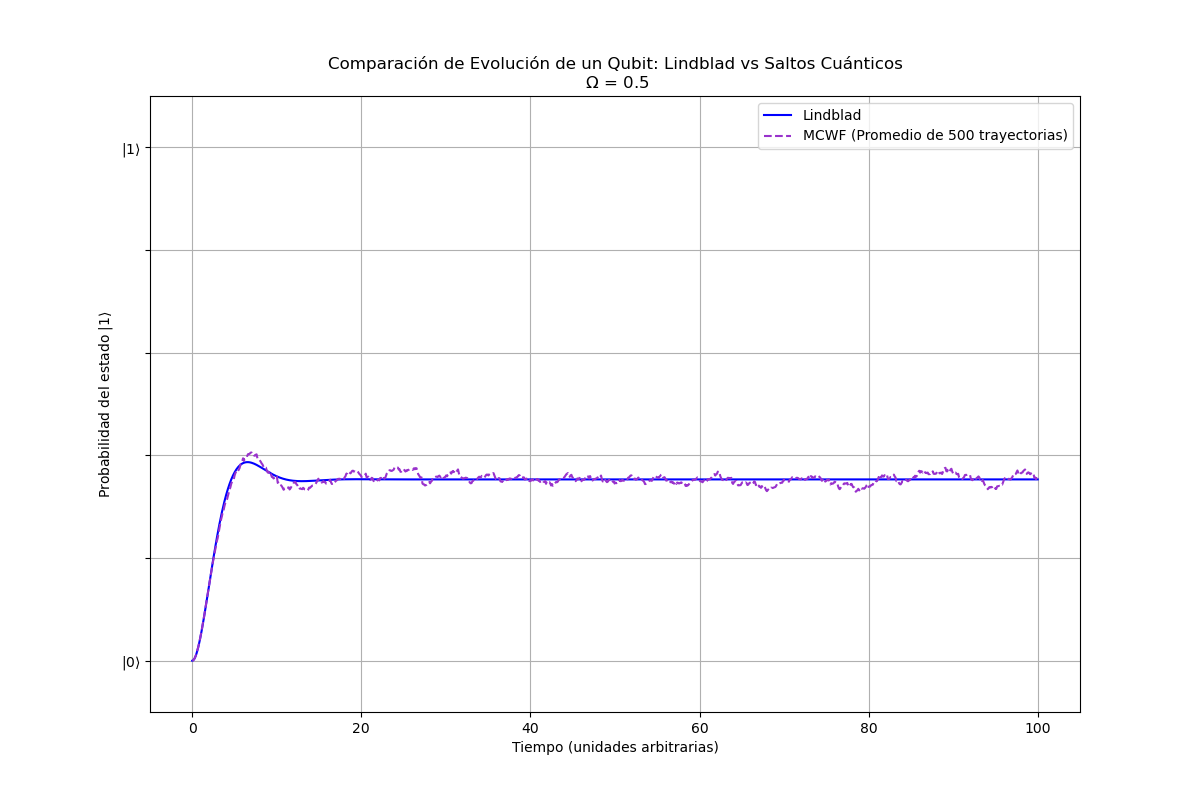

10.0%. Run time:   1.86s. Est. time left: 00:00:00:16
20.0%. Run time:   3.79s. Est. time left: 00:00:00:15
30.0%. Run time:   5.72s. Est. time left: 00:00:00:13
40.0%. Run time:   7.63s. Est. time left: 00:00:00:11
50.0%. Run time:   9.56s. Est. time left: 00:00:00:09
60.0%. Run time:  11.49s. Est. time left: 00:00:00:07
70.0%. Run time:  13.42s. Est. time left: 00:00:00:05
80.0%. Run time:  15.32s. Est. time left: 00:00:00:03
90.0%. Run time:  17.23s. Est. time left: 00:00:00:01
100.0%. Run time:  19.12s. Est. time left: 00:00:00:00
Total run time:  19.17s


/var/folders/fs/26sswljj1xx23wcg994nfzj40000gn/T/ipykernel_67124/2121487946.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 8))


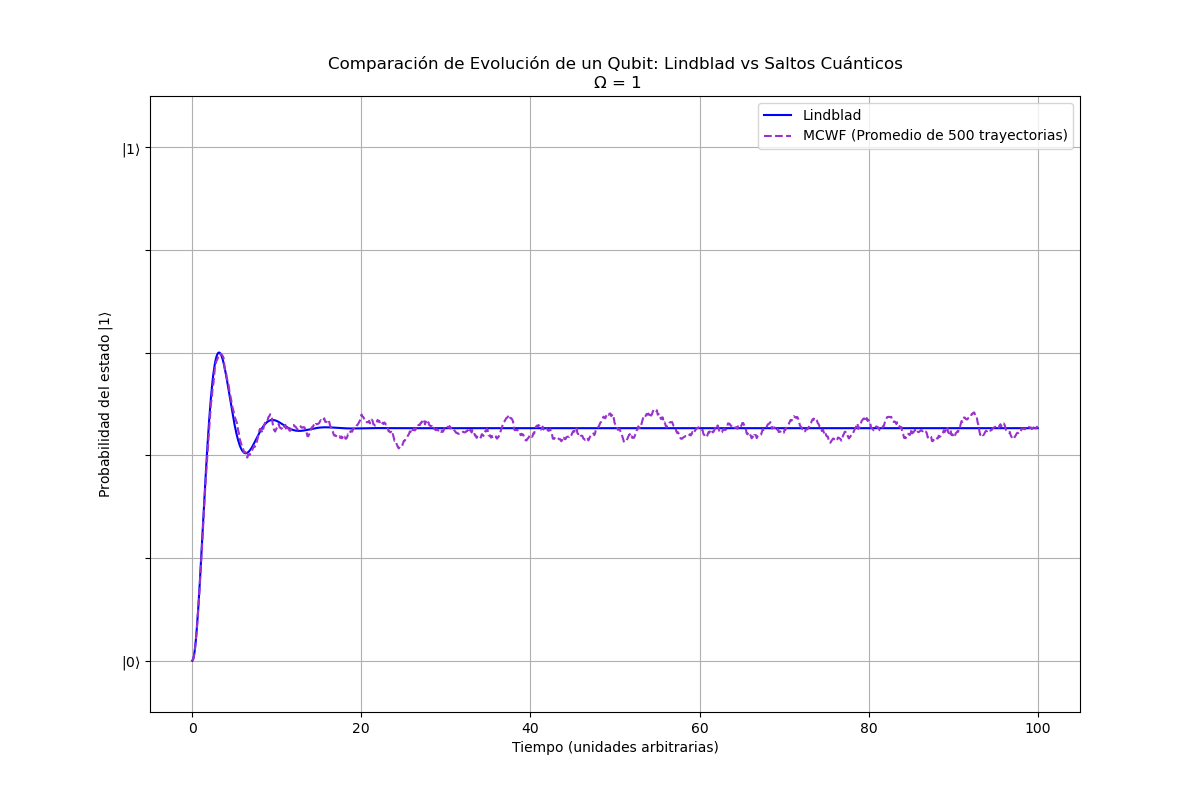

10.0%. Run time:   2.25s. Est. time left: 00:00:00:20
20.0%. Run time:   4.56s. Est. time left: 00:00:00:18
30.0%. Run time:   6.86s. Est. time left: 00:00:00:16
40.0%. Run time:   9.22s. Est. time left: 00:00:00:13
50.0%. Run time:  11.54s. Est. time left: 00:00:00:11
60.0%. Run time:  13.80s. Est. time left: 00:00:00:09
70.0%. Run time:  16.09s. Est. time left: 00:00:00:06
80.0%. Run time:  18.40s. Est. time left: 00:00:00:04
90.0%. Run time:  20.71s. Est. time left: 00:00:00:02
100.0%. Run time:  23.00s. Est. time left: 00:00:00:00
Total run time:  23.05s


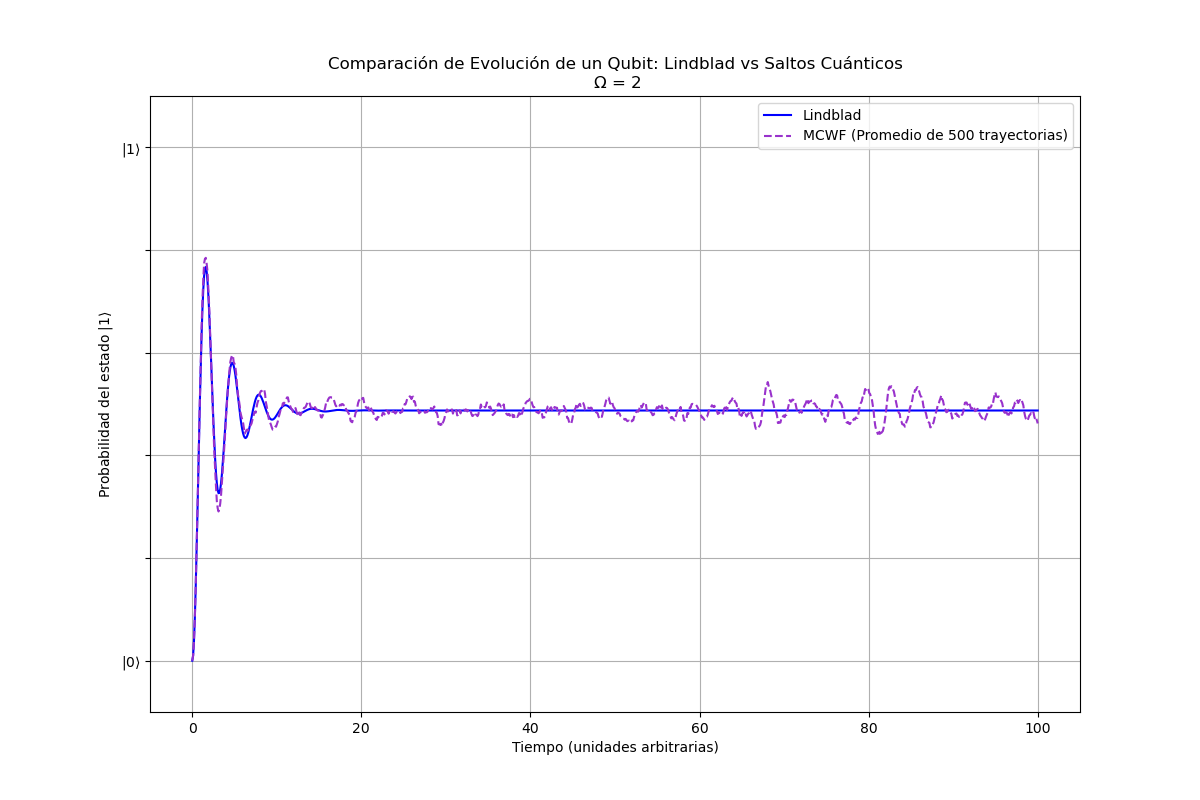

10.0%. Run time:   3.80s. Est. time left: 00:00:00:34
20.0%. Run time:   7.71s. Est. time left: 00:00:00:30
30.0%. Run time:  11.61s. Est. time left: 00:00:00:27
40.0%. Run time:  15.51s. Est. time left: 00:00:00:23
50.0%. Run time:  19.44s. Est. time left: 00:00:00:19
60.0%. Run time:  23.48s. Est. time left: 00:00:00:15
70.0%. Run time:  27.43s. Est. time left: 00:00:00:11
80.0%. Run time:  31.35s. Est. time left: 00:00:00:07
90.0%. Run time:  35.31s. Est. time left: 00:00:00:03
100.0%. Run time:  39.23s. Est. time left: 00:00:00:00
Total run time:  39.31s


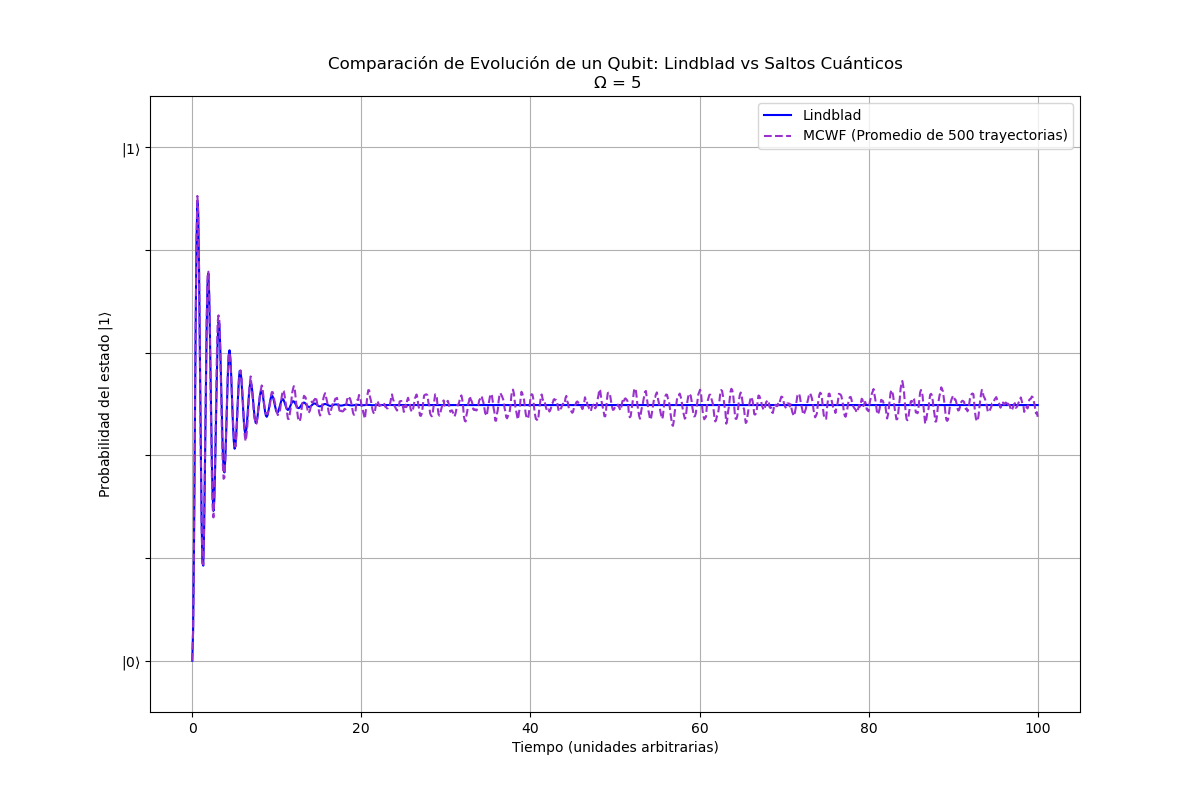

In [13]:
# Definimos los operadores de Pauli usando Qobj de Qutip
sigma_z = Qobj([[1, 0], [0, -1]])
sigma_plus = Qobj([[0, 0], [1, 0]])
sigma_minus = Qobj([[0, 1], [0, 0]])

# Parámetros del sistema
hbar = 1
Delta_q = 0.1
Omega_values = [0.01, 0.5, 1, 2, 5]
gamma = 0.2

# Estado inicial del qubit
psi0 = basis(2, 0)  # |0>

t_points = 1000
t_max = 100
t = np.linspace(0, t_max, t_points)

for Omega in Omega_values:
    # Definimos el hamiltoniano con hbar
    H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

    # Operadores de Lindblad
    L1 = sigma_z
    L2 = sigma_minus

    # Solución de la ecuación de Lindblad usando Qutip
    c_ops = [np.sqrt(gamma) * L1, np.sqrt(gamma) * L2]
    result_lindblad = mesolve(H, psi0, t, c_ops, [basis(2, 1).proj()])

    # Probabilidad del estado |1> en función del tiempo para Lindblad
    p1_lindblad = result_lindblad.expect[0]

    # Solución de la ecuación de saltos cuánticos usando mcsolve
    result_mc = mcsolve(H, psi0, t, c_ops, [basis(2, 1).proj()], ntraj=500)

    # Promedio de las trayectorias
    expect_mc = np.array(result_mc.expect[0])
    if expect_mc.ndim == 2:
        p1_mc = np.mean(expect_mc, axis=0)
    else:
        p1_mc = expect_mc

    # Verificamos que p1_mc tenga la misma longitud que t
    if len(p1_mc) != len(t):
        raise ValueError(f"Length mismatch: len(p1_mc)={len(p1_mc)} and len(t)={len(t)}")

    # Gráficas
    plt.figure(figsize=(12, 8))
    plt.plot(t, p1_lindblad, label='Lindblad', color='blue')
    plt.plot(t, p1_mc, label='MCWF (Promedio de 500 trayectorias)', color='darkorchid', linestyle='--')
    plt.xlabel('Tiempo (unidades arbitrarias)')
    plt.ylabel('Probabilidad del estado $|1\\rangle$')
    plt.yticks(np.linspace(0, 1, 6), [r'$|0\rangle$', '', '', '', '', r'$|1\rangle$'])
    plt.xticks(np.linspace(0, 100, 6), ['0', '20', '40', '60', '80', '100'])
    plt.ylim(-0.1, 1.1)
    plt.title(f'Comparación de Evolución de un Qubit: Lindblad vs Saltos Cuánticos\n $\Omega$ = {Omega}')
    plt.legend()
    plt.grid()
    plt.show()

Que omega tenga distintos valores significa lo siguiente:

$\Omega$ = frec. de Rabi

- Valores pequeños de $\Omega$:
Cuando $\Omega$ es pequeño, el sistema oscila lentamente entre los estados $|0\rangle$ y $|1\rangle$. Esto puede corresponder a un campo externo débil o una interacción débil entre el sistema y el campo.


- Valores grandes de $\Omega$:
Cuando $\Omega$ es grande, el sistema oscila rápidamente entre los estados $|0\rangle$ y $|1\rangle$. Esto puede ser debido a un campo externo fuerte o una interacción fuerte entre el sistema y el campo.

- Velocidad de las Transiciones:

A medida que $\Omega$ aumenta, la frecuencia de las oscilaciones en la probabilidad de ocupación del estado $|1\rangle$ también aumenta. Esto significa que el sistema cambia de estado más rápidamente.

- Amplitud de las Oscilaciones:

En un sistema ideal sin decoherencia, la amplitud de las oscilaciones entre los estados 
$|0\rangle$ y $|1\rangle$ permanece constante. Sin embargo, en presencia de decoherencia, la amplitud de las oscilaciones puede disminuir con el tiempo.

- Interacción con la Decoherencia:

La decoherencia y la disipación introducidas por los operadores de Lindblad afectan la dinámica del sistema. Para valores grandes de $\Omega$, la interacción fuerte con el campo externo puede competir con los efectos de decoherencia, mientras que para valores pequeños de $\Omega$, los efectos de decoherencia pueden dominar la dinámica del sistema.

## Diferentes valores de $\gamma$ y su explicación física

10.0%. Run time:   1.60s. Est. time left: 00:00:00:14
20.0%. Run time:   3.26s. Est. time left: 00:00:00:13
30.0%. Run time:   4.90s. Est. time left: 00:00:00:11
40.0%. Run time:   6.56s. Est. time left: 00:00:00:09
50.0%. Run time:   8.20s. Est. time left: 00:00:00:08
60.0%. Run time:   9.86s. Est. time left: 00:00:00:06
70.0%. Run time:  11.52s. Est. time left: 00:00:00:04
80.0%. Run time:  13.17s. Est. time left: 00:00:00:03
90.0%. Run time:  14.81s. Est. time left: 00:00:00:01
100.0%. Run time:  16.45s. Est. time left: 00:00:00:00
Total run time:  16.49s


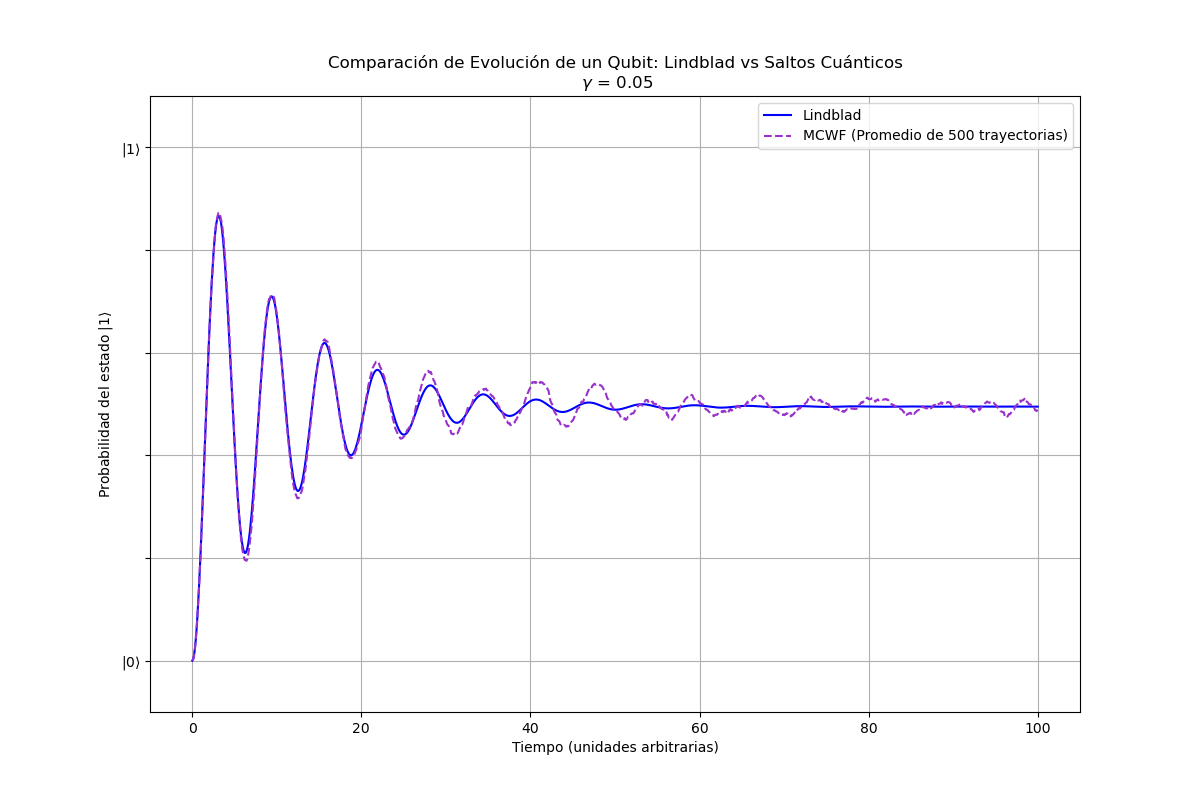

10.0%. Run time:   1.85s. Est. time left: 00:00:00:16
20.0%. Run time:   3.73s. Est. time left: 00:00:00:14
30.0%. Run time:   5.70s. Est. time left: 00:00:00:13
40.0%. Run time:   7.60s. Est. time left: 00:00:00:11
50.0%. Run time:   9.52s. Est. time left: 00:00:00:09
60.0%. Run time:  11.45s. Est. time left: 00:00:00:07
70.0%. Run time:  13.39s. Est. time left: 00:00:00:05
80.0%. Run time:  15.28s. Est. time left: 00:00:00:03
90.0%. Run time:  17.23s. Est. time left: 00:00:00:01
100.0%. Run time:  19.16s. Est. time left: 00:00:00:00
Total run time:  19.21s


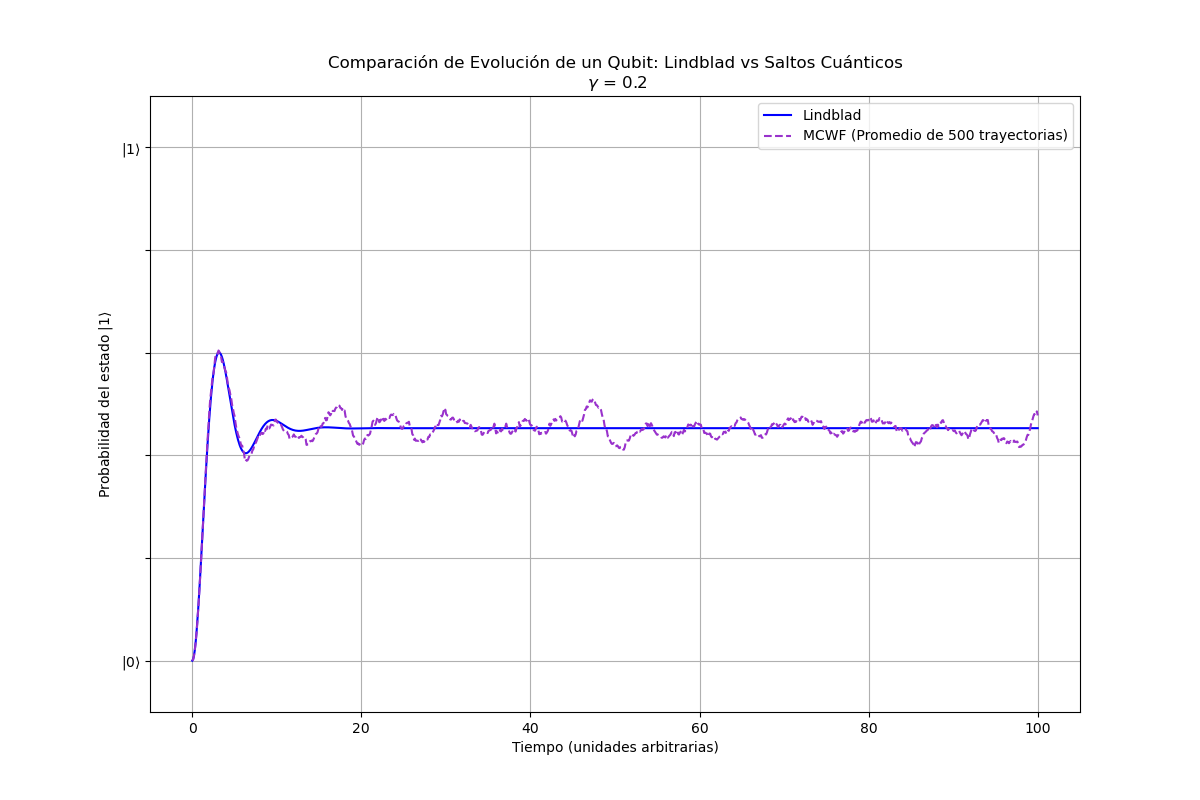

10.0%. Run time:   2.45s. Est. time left: 00:00:00:22
20.0%. Run time:   4.87s. Est. time left: 00:00:00:19
30.0%. Run time:   7.29s. Est. time left: 00:00:00:16
40.0%. Run time:   9.69s. Est. time left: 00:00:00:14
50.0%. Run time:  12.14s. Est. time left: 00:00:00:12
60.0%. Run time:  14.56s. Est. time left: 00:00:00:09
70.0%. Run time:  16.99s. Est. time left: 00:00:00:07
80.0%. Run time:  19.43s. Est. time left: 00:00:00:04
90.0%. Run time:  21.90s. Est. time left: 00:00:00:02
100.0%. Run time:  24.32s. Est. time left: 00:00:00:00
Total run time:  24.37s


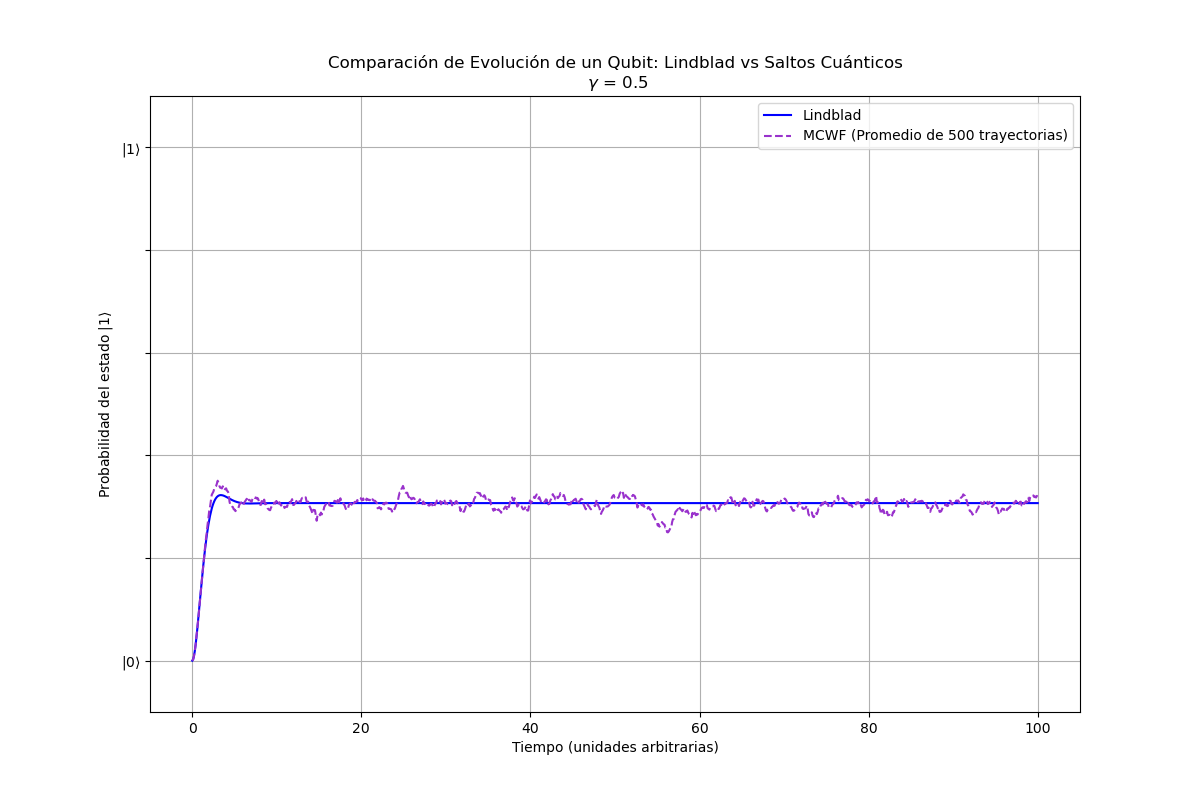

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Definimos los operadores de Pauli usando Qobj de Qutip
sigma_z = Qobj([[1, 0], [0, -1]])
sigma_plus = Qobj([[0, 0], [1, 0]])
sigma_minus = Qobj([[0, 1], [0, 0]])

# Parámetros del sistema
hbar = 1
Delta_q = 0.1
Omega = 1.0  # Mantendremos Omega constante para ver el efecto de gamma
gamma_values = [0.05, 0.2, 0.5]  # Distintos valores de gamma para comparación

# Estado inicial del qubit
psi0 = basis(2, 0)  # |0>

t_points = 1000
t_max = 100
t = np.linspace(0, t_max, t_points)

for gamma in gamma_values:
    # Definimos el hamiltoniano con hbar
    H = (hbar * Delta_q / 2) * sigma_z + (hbar * Omega / 2) * (sigma_plus + sigma_minus)

    # Operadores de Lindblad
    L1 = sigma_z
    L2 = sigma_minus

    # Solución de la ecuación de Lindblad usando Qutip
    c_ops = [np.sqrt(gamma) * L1, np.sqrt(gamma) * L2]
    result_lindblad = mesolve(H, psi0, t, c_ops, [basis(2, 1).proj()])

    # Probabilidad del estado |1> en función del tiempo para Lindblad
    p1_lindblad = result_lindblad.expect[0]

    # Solución de la ecuación de saltos cuánticos usando mcsolve
    result_mc = mcsolve(H, psi0, t, c_ops, [basis(2, 1).proj()], ntraj=500)

    # Promedio de las trayectorias
    expect_mc = np.array(result_mc.expect[0])
    if expect_mc.ndim == 2:
        p1_mc = np.mean(expect_mc, axis=0)
    else:
        p1_mc = expect_mc

    # Verificamos que p1_mc tenga la misma longitud que t
    if len(p1_mc) != len(t):
        raise ValueError(f"Length mismatch: len(p1_mc)={len(p1_mc)} and len(t)={len(t)}")

    # Gráficas
    plt.figure(figsize=(12, 8))
    plt.plot(t, p1_lindblad, label='Lindblad', color='blue')
    plt.plot(t, p1_mc, label='MCWF (Promedio de 500 trayectorias)', color='darkorchid', linestyle='--')
    plt.xlabel('Tiempo (unidades arbitrarias)')
    plt.ylabel('Probabilidad del estado $|1\\rangle$')
    plt.yticks(np.linspace(0, 1, 6), [r'$|0\rangle$', '', '', '', '', r'$|1\rangle$'])
    plt.xticks(np.linspace(0, 100, 6), ['0', '20', '40', '60', '80', '100'])
    plt.ylim(-0.1, 1.1)
    plt.title(f'Comparación de Evolución de un Qubit: Lindblad vs Saltos Cuánticos\n $\gamma$ = {gamma}')
    plt.legend()
    plt.grid()
    plt.show()

- A medida que $\gamma$ aumenta, las oscilaciones en la probabilidad de ocupación del estado $|1\rangle$ se amortiguan más rápidamente. Esto significa que la influencia del entorno causa que el sistema pierda coherencia más rápido.

- Para valores grandes de $\gamma$ , el sistema rápidamente alcanza un estado mixto donde la probabilidad del estado $|1\rangle$ se estabiliza en un valor constante, que refleja la mezcla de los estados $|0\rangle$ y $|1\rangle$.

- La interacción entre la tasa de decoherencia y la frecuencia de Rabi determina cómo el sistema oscila y se estabiliza. Una decoherencia alta puede dominar la dinámica y suprimir las oscilaciones inducidas por $\Omega$.

- Valores pequeños de $\gamma$: La decoherencia es lenta, las oscilaciones del sistema se mantienen durante más tiempo.
- Valores grandes de $\gamma$: La decoherencia es rápida, las oscilaciones del sistema se amortiguan rápidamente, llevando el sistema a un estado mixto.

DESARROLLO